In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt

In [23]:
# Reading data into pandas dataframe
path = r"C:\Users\llubowa\Downloads\fitness_class_2212.csv"
df = pd.read_csv(path)

In [25]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [26]:
df['weight'].fillna(round(df['weight'].mean(),2),inplace=True)
df['days_before'] = df['days_before'].str.replace(" days","").astype(int)
df['day_of_week'].replace('Wednesday','Wed',inplace=True)
df['day_of_week'].replace('Monday','Mon',inplace=True)
df['day_of_week'].replace('Fri.','Fri',inplace=True)
df['day_of_week']=df['day_of_week'].astype('category')
df['time'] = df['time'].astype('category')
df['category'] = df['category'].str.replace('-','unknown')
df['category']=df['category'].astype('category')
df['attended']=df['attended'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int32   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(4), float64(1), int32(1), int64(2)
memory usage: 47.8 KB


Data field datatypes and the manipulations done to them

booking_id: Nominal. No missing values and every value is unique of integer  datatype.

months_as_member:Ordinal. No missing values. The minimum value is 1. Datatype is integer

Weight: Has 20 missing values. They have been replaced with the average(82.61) rounded to 2 decimal places.Minimum value is 55.41 kg and the datatype is float

Days_before: No missing values. The string " days" has been dropped off the values it was attached and the datatype changed to integer. The minimum value is 1 for this column

day_of_week: No missing values. Values 'Wednesday','Monday'and 'Fri.' were replaced with 'Wed','Mon' and 'Fri' respectively to match the column description. Datatype changed to category.

Time: No missing values. Has two categories 'AM'and 'PM'. Datatype was changed to category

Category: 13 missing values represented as '-', these were replaced with 'unknown'. Datatype changed to category

attended: No missing values.Has two classes 1 and 0. Datatype changed to category

In [27]:
df['weight'].describe()

count    1500.000000
mean       82.610373
std        12.680411
min        55.410000
25%        73.562500
50%        81.035000
75%        89.382500
max       170.520000
Name: weight, dtype: float64

In [28]:
# Correlation between weight and months as a member
df['weight'].corr(df['months_as_member'])

-0.4655935420908633

Data Analysis

We want to identify the members who are more likely to miss the fitness classes

C:\Users\llubowa\AppData\Local\Temp\ipykernel_8440\1014357982.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


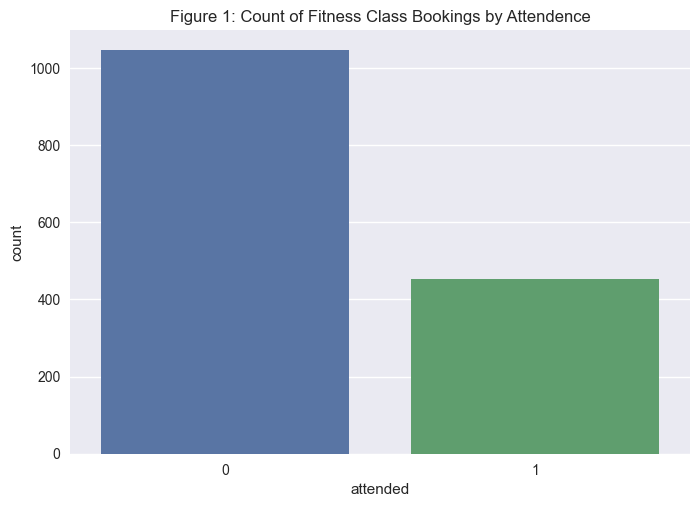

In [32]:
# Univariate graph
style.use('seaborn')
sns.countplot(data=df,x='attended')
plt.title('Figure 1: Count of Fitness Class Bookings by Attendence');

From Figure 1, the observations are imbalanced accross the categories of attended. The number of observations in category(0) are more than twice that of category(1).

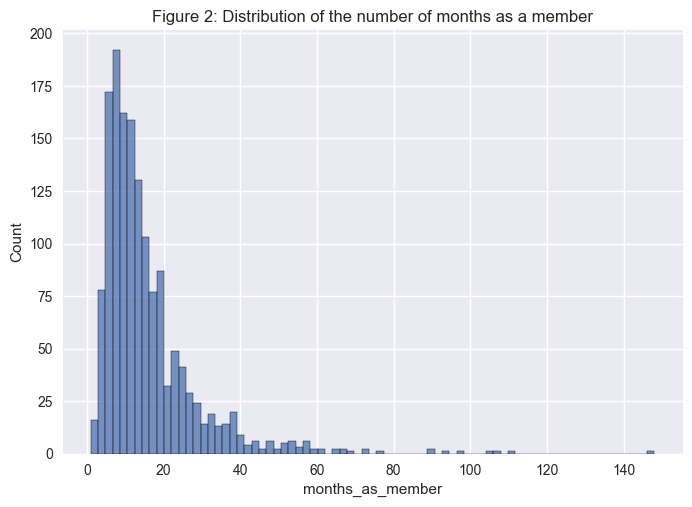

In [33]:
# Univariate graph
sns.histplot(data=df,x='months_as_member')
plt.title('Figure 2: Distribution of the number of months as a member');

From figure 2, the distribution of the number of months as a member to fittness class is skewed to the right. Most members have been fittness club members for less than 20 months with very few who have been members for over 100 months.

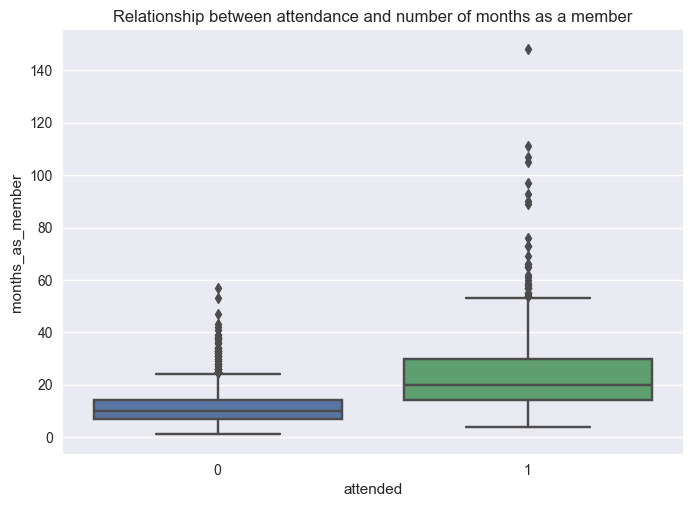

In [38]:
# Multivariate graph
sns.boxplot(data=df,x='attended',y='months_as_member')
plt.title('Relationship between attendance and number of months as a member');

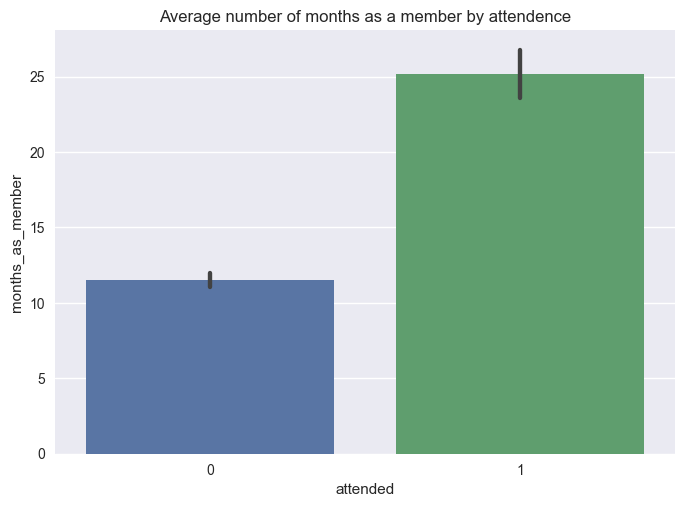

In [39]:
sns.barplot(data=df, x='attended',y='months_as_member')
plt.title('Average number of months as a member by attendence');

From the graphs above, the average number of months as a member for members who did not attend the class (0) is lower that that for those who attended the class (1).


Insight drawn

Most of the members who did not attend classes have been member of the club for less than 20 months.